In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,UpSampling2D
from keras.datasets import mnist
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape
x_train.shape

(60000, 28, 28, 1)

In [5]:
def Gausian_noise(x,sigma=0.5):
    noise = np.random.normal(loc=0, scale=sigma, size=x.shape)
    return x + noise


In [6]:
#creating nosiey images 
x_train_noisy=Gausian_noise(x_train)
x_test_noisy=Gausian_noise(x_test)

In [7]:
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)

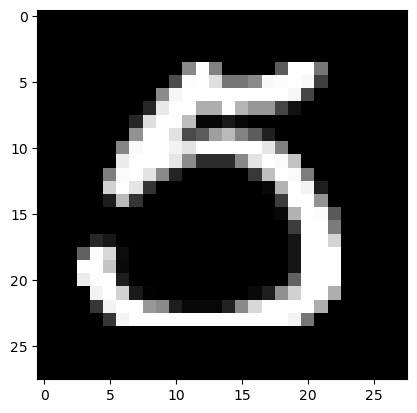

In [8]:
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28,1))
plt.gray()

<function matplotlib.pyplot.gray()>

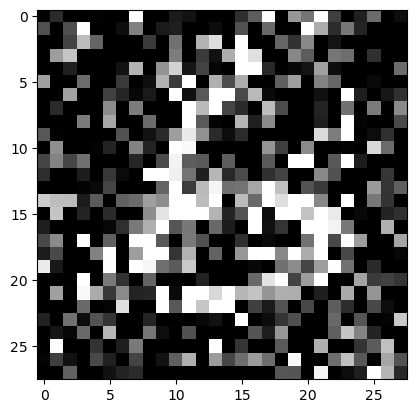

In [9]:
index=np.random.randint(len(x_train_noisy))
plt.imshow(x_train_noisy[index].reshape(28,28,1))
plt.gray

In [10]:

model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [11]:
import tensorflow as tf
import math
early_stopping = EarlyStopping(monitor='val_loss',patience=2)


def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.1
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

In [12]:
callbacks = [early_stopping, lr_scheduler]

In [13]:
history=model.fit(x_train_noisy, x_train, epochs=50, batch_size=256, validation_data=(x_test_noisy, x_test),callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
235/235 [==============================] - 12s 12ms/step - loss: 0.2411 - val_loss: 0.1378 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1302 - val_loss: 0.1225 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1209 - val_loss: 0.1192 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1169 - val_loss: 0.1140 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1144 - val_loss: 0.1118 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/50
235/235 [=========================

In [14]:
pred = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


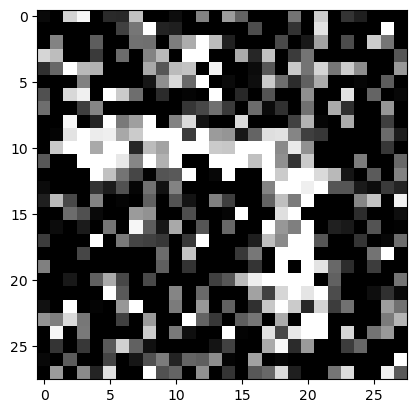

In [15]:

# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

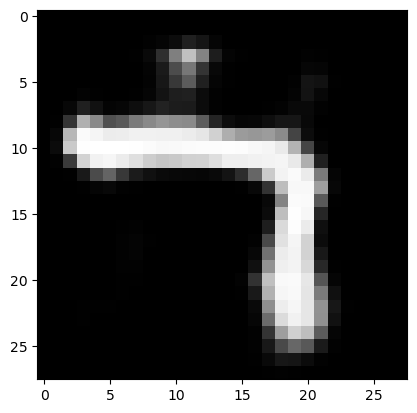

In [16]:
plt.imshow(pred[index].reshape(28,28))
plt.gray()


we can see our model performs well and denoising is done succesfully


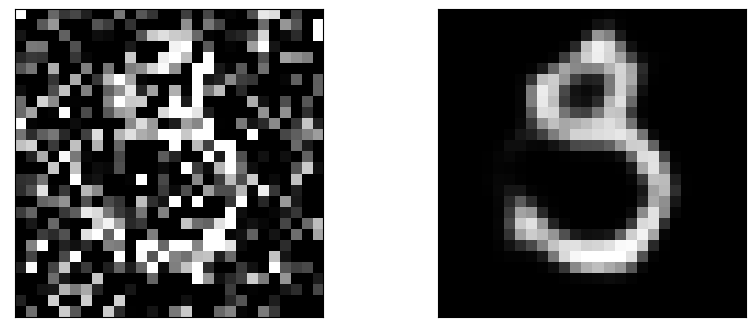

In [17]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()